In [1]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import corner
import time 
from scipy.stats import norm, laplace

from scipy.stats import anderson_ksamp, ks_2samp, shapiro
from scipy.optimize import curve_fit


In [36]:
start_time_cut = 4
end_time_cut = 6

In [37]:
#try testing with the resonant dataset
res_test = pd.read_csv("../../csvs/resonant_data.csv", index_col=0)
res_test.head()

,runstring,seed,pairindex,j,k,Zstar,libfac,Zcom,instability_time,shadow_instability_time
0,0000000.bin,3500000,1,12,1,0.021650,0.007181,0.041669,1.545872e+06,3.063700e+06
1,0000001.bin,700001,1,19,2,0.060291,0.523204,0.010656,9.990000e+08,9.990000e+08
2,0000002.bin,2,0,6,1,0.026353,0.012995,0.050319,9.990000e+08,9.990000e+08
3,0000003.bin,2100003,0,5,2,0.023511,0.713415,0.102200,2.287671e+06,8.392234e+06
4,0000004.bin,700004,0,12,1,0.017473,0.003612,0.039803,9.668931e+05,3.380350e+05


In [38]:
test_samples = res_test[ (np.log10(res_test["instability_time"])<end_time_cut ) &
                       (np.log10(res_test["shadow_instability_time"])<end_time_cut ) &
                       (np.log10(res_test["instability_time"])>start_time_cut ) &
                       (np.log10(res_test["shadow_instability_time"])>start_time_cut ) ]


print(test_samples.shape)
diff_data = np.log10(test_samples["instability_time"]) - np.log10(test_samples["shadow_instability_time"])


(3633, 10)


In [39]:
# load the differences for random systems
random_test_systems = pd.read_csv("../../csvs/deltatimes.csv", index_col =0)

random_reduced_systems = random_test_systems[(np.log10(random_test_systems["t"]) > start_time_cut)  &
                               (np.log10(random_test_systems["t"]) < end_time_cut) &
                               (np.log10(random_test_systems["t_shadow"]) > start_time_cut) &
                               (np.log10(random_test_systems["t_shadow"])< end_time_cut) ]
random_reduced_systems["diff"] = np.log10(random_reduced_systems["t"]) -np.log10(random_reduced_systems["t_shadow"])
print(random_reduced_systems.shape)
random_reduced_systems.head()

(3230, 4)


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,runstring,t,t_shadow,diff
1,0000001.bin,134874.883234,213307.156880,-0.199074
21,0000021.bin,359024.215651,646731.388681,-0.255600
25,0000025.bin,370834.044418,671974.880182,-0.258173
28,0000028.bin,33746.408229,41949.192113,-0.094496
31,0000031.bin,26710.958640,52379.153468,-0.292469


In [40]:
ks_2samp(random_reduced_systems["diff"].values, diff_data)

Ks_2sampResult(statistic=0.013011617789799217, pvalue=1.0)

In [41]:
import scipy
scipy.__version__

'1.3.1'

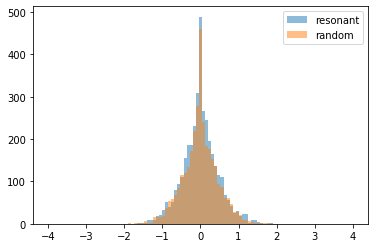

In [42]:
bins = np.linspace(-4, 4, 100)
plt.hist(diff_data, bins = bins, label = "resonant", alpha = 0.5)
plt.hist(random_reduced_systems["diff"].values, bins = bins, label = "random", alpha = 0.5)
plt.legend()

In [44]:
# Resonant Data

file_path = "../../csvs/Res_3_feats/"
resonant_shadow_systems = pd.read_csv(file_path + "Gaussian_Fits_317.csv")
resonant_shadow_systems.tail()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
312,391.0,0.380109,4.832709,0.479577,0.021807,0.015415,1.130073e-07
313,393.0,0.181957,5.364817,1.022106,0.046608,0.033712,2.467449e-06
314,394.0,0.598461,6.614040,0.297937,0.013410,0.009552,1.640262e-08
315,395.0,0.409190,4.146248,0.439739,0.019946,0.013836,7.615377e-08
316,399.0,0.502488,6.190145,0.358946,0.016343,0.011388,3.460652e-08


In [56]:
res_test_shadow_system = res_test[ np.isin(res_test.index.values, resonant_shadow_systems["ID"])]
res_test_shadow_system_diff_data = res_test_shadow_system[ (np.log10(res_test_shadow_system["instability_time"])<end_time_cut ) &
                       (np.log10(res_test_shadow_system["shadow_instability_time"])<end_time_cut ) &
                       (np.log10(res_test_shadow_system["instability_time"])>start_time_cut ) &
                       (np.log10(res_test_shadow_system["shadow_instability_time"])>start_time_cut ) ]


# print(res_test_shadow_system_diff_data)
res_diff_data = np.log10(res_test_shadow_system_diff_data["instability_time"]) - np.log10(res_test_shadow_system_diff_data["shadow_instability_time"])
res_diff_data

4      0.456417
5      1.022938
9     -0.437143
13    -0.178312
14    -0.024130
         ...   
377    0.089201
382   -0.448704
391   -0.406665
393    1.480145
395    0.197466
Length: 134, dtype: float64

In [62]:
# plt.hist(res_diff_data, bins = bins)

In [64]:
# random_data
file_path = "../../../Long300/"
random_shadow_systems = pd.read_csv("../../Figures/MCMCFigures/ProbabilityTable_Fixed_Covariences_266.csv", index_col=0)


random_test_shadow_system = random_test_systems[ np.isin(random_test_systems.index.values, random_shadow_systems["ID"])]
random_test_shadow_system_diff_data = random_test_shadow_system[ (np.log10(random_test_shadow_system["t"])<end_time_cut ) &
                       (np.log10(random_test_shadow_system["t_shadow"])<end_time_cut ) &
                       (np.log10(random_test_shadow_system["t"])>start_time_cut ) &
                       (np.log10(random_test_shadow_system["t_shadow"])>start_time_cut ) ]

(array([ 2.,  0.,  7., 20., 23., 52., 39., 22.,  9.,  6.]),
 array([-1.42341384, -1.17845726, -0.93350067, -0.68854409, -0.4435875 ,
        -0.19863092,  0.04632566,  0.29128225,  0.53623883,  0.78119541,
         1.026152  ]),
 <a list of 10 Patch objects>)

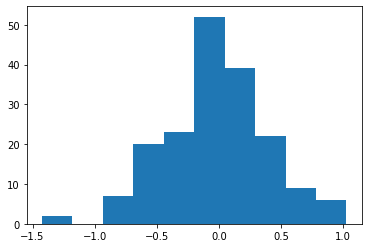

In [68]:
random_diff_data = np.log10(random_test_shadow_system_diff_data["t"]) - np.log10(random_test_shadow_system_diff_data["t_shadow"])

/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


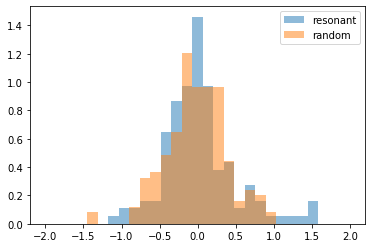

In [74]:
bins = np.linspace(-2, 2, 30)
plt.hist(res_diff_data, bins = bins, label = "resonant", alpha = 0.5, normed = 1)
plt.hist(random_diff_data, bins = bins, label = "random", alpha = 0.5, normed = 2)
plt.legend()

In [71]:
ks_2samp(res_diff_data, random_diff_data)

Ks_2sampResult(statistic=0.06791044776119402, pvalue=0.8391424019063207)